In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Zadanie 1

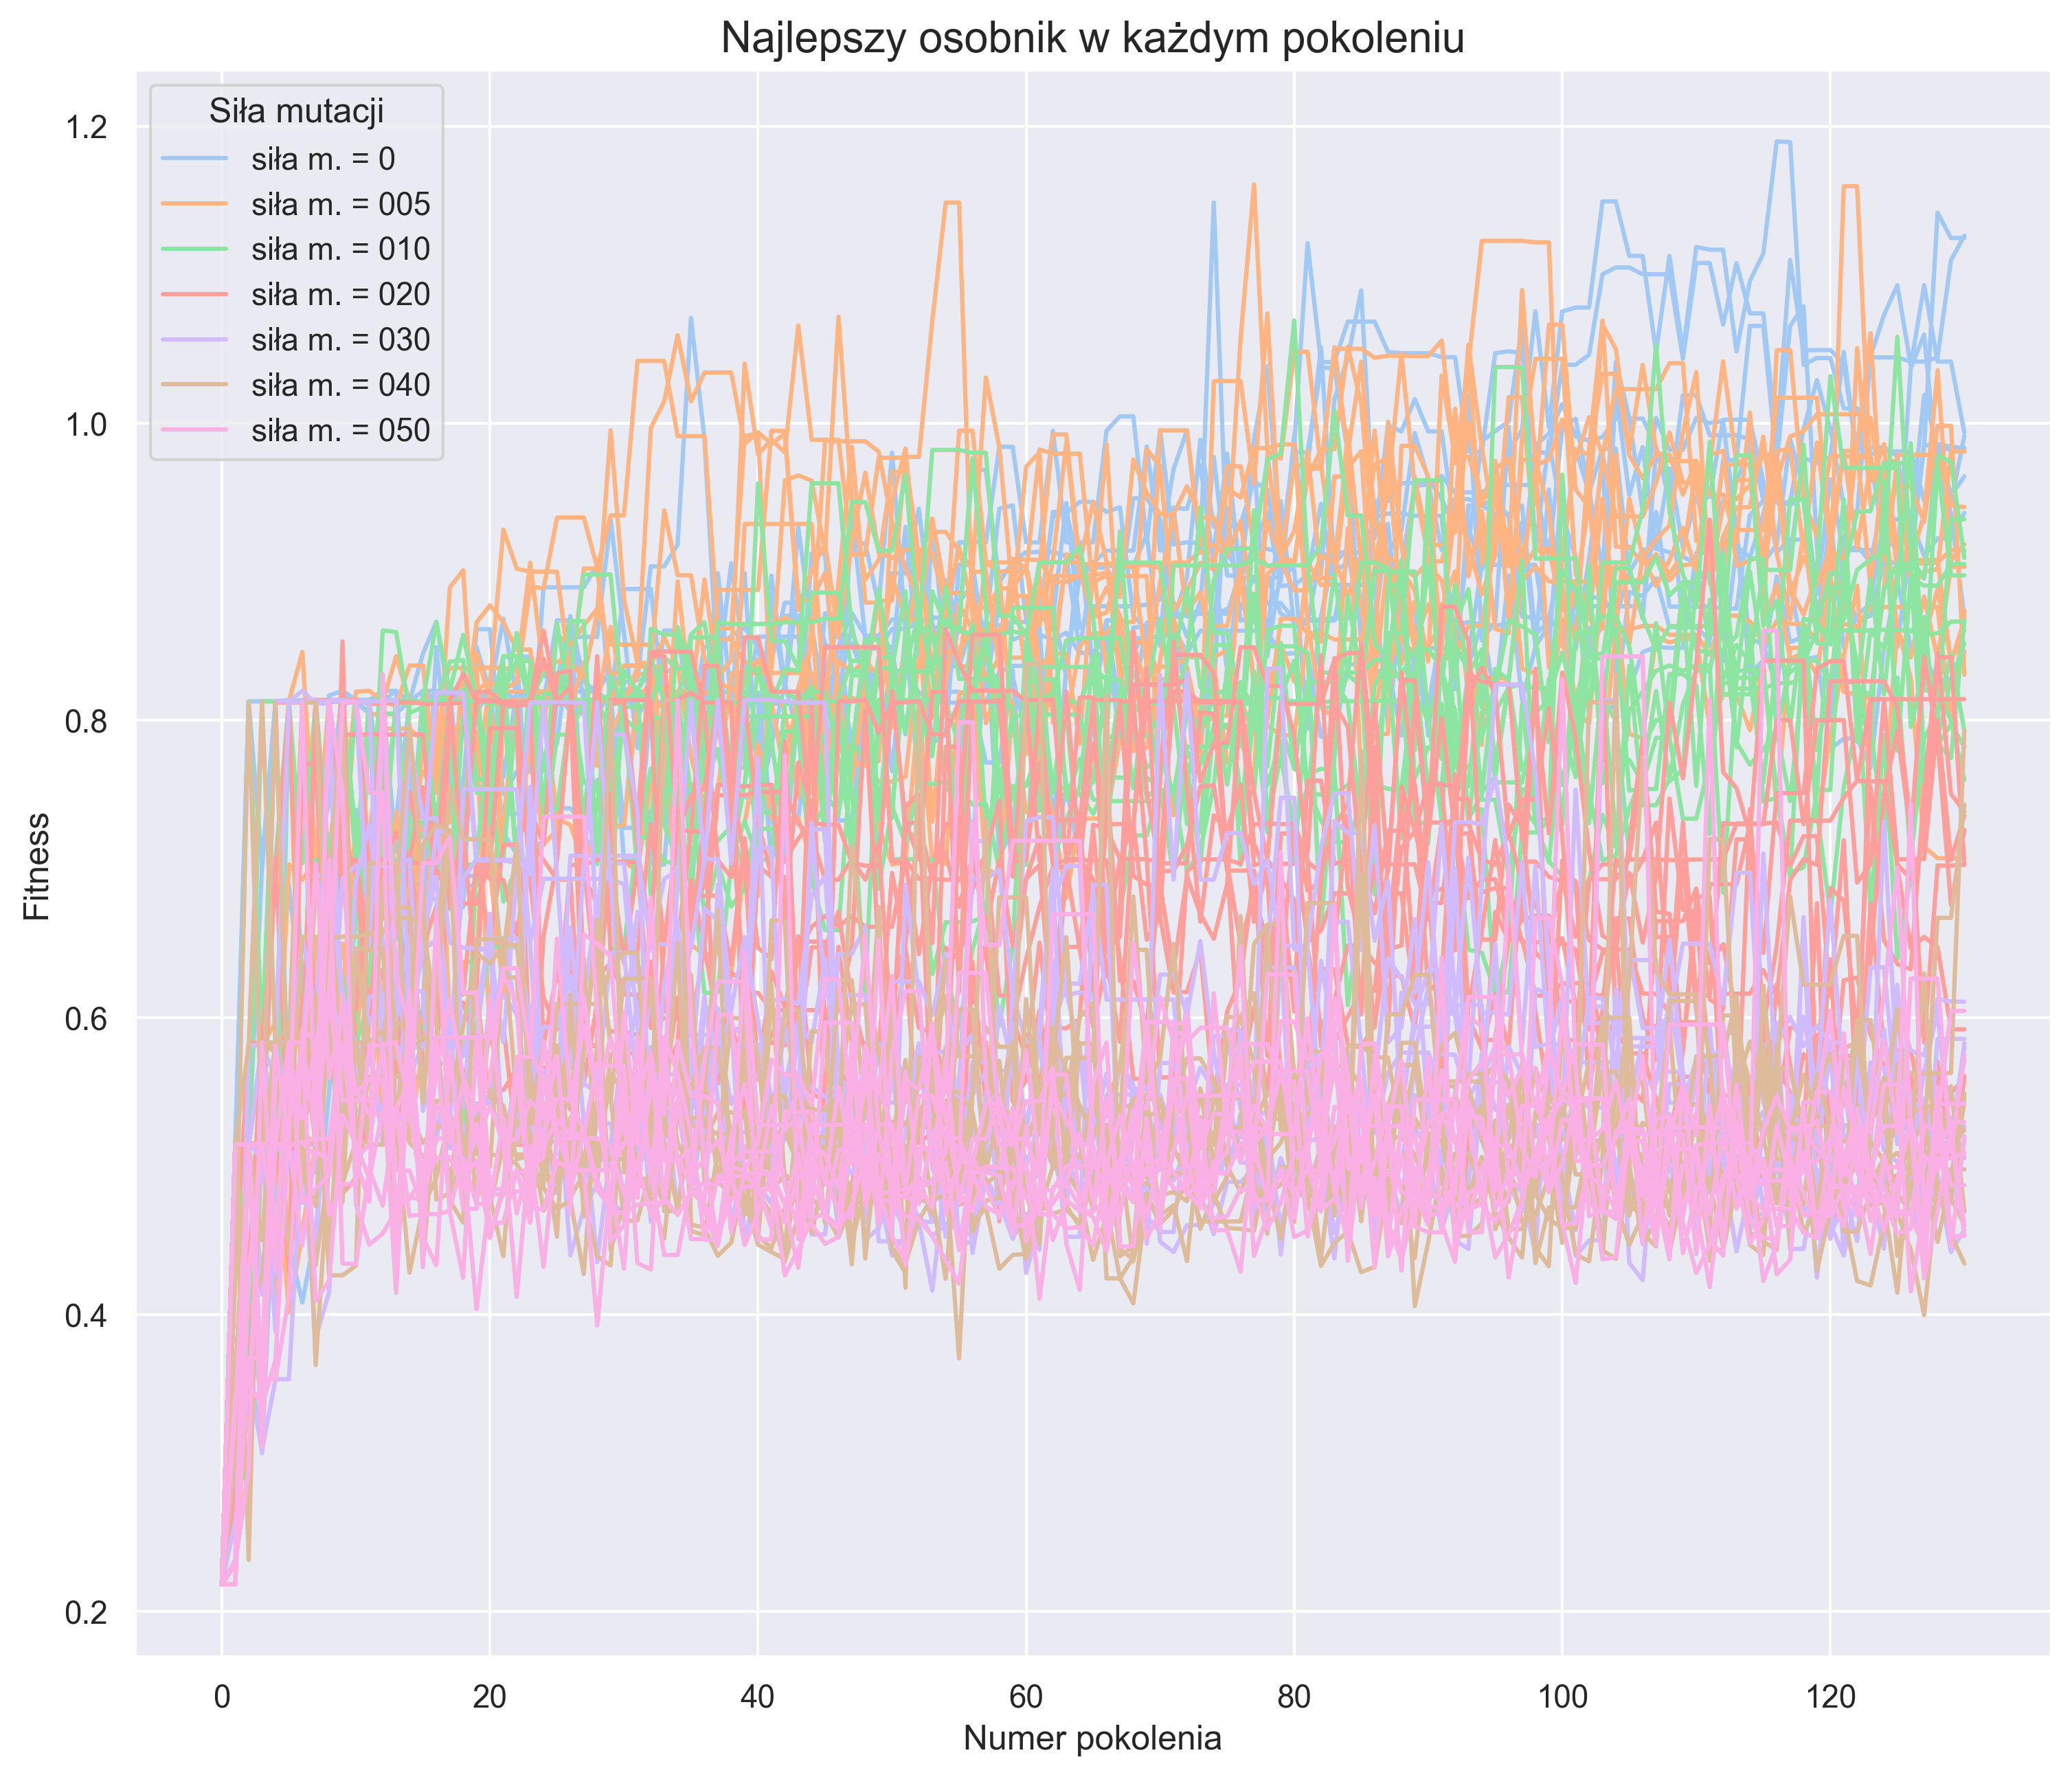

In [60]:
M_VALUES = ["0", "005", "010", "020", "030", "040", "050"]
palette = sns.color_palette("pastel", len(M_VALUES))
color_map = dict(zip(M_VALUES, palette)) 
plt.figure(figsize=(12, 10), dpi=300)

for m_value in M_VALUES:
    for i in range(1, 11):
        df = pd.read_csv(f"../framspy/f9-mut-{m_value}/Deap/f9-{i}.csv", usecols=['gen', 'max'])
        sns.lineplot(df, x='gen', y='max', color=color_map[m_value], label=f"siła m. = {m_value}" if i == 1 else "")

plt.title("Najlepszy osobnik w każdym pokoleniu", fontsize=15)
plt.ylabel("Fitness")
plt.xlabel("Numer pokolenia")

plt.legend(title="Siła mutacji")
plt.savefig('zadanie3-1.png')
plt.show()

# Zadanie 2

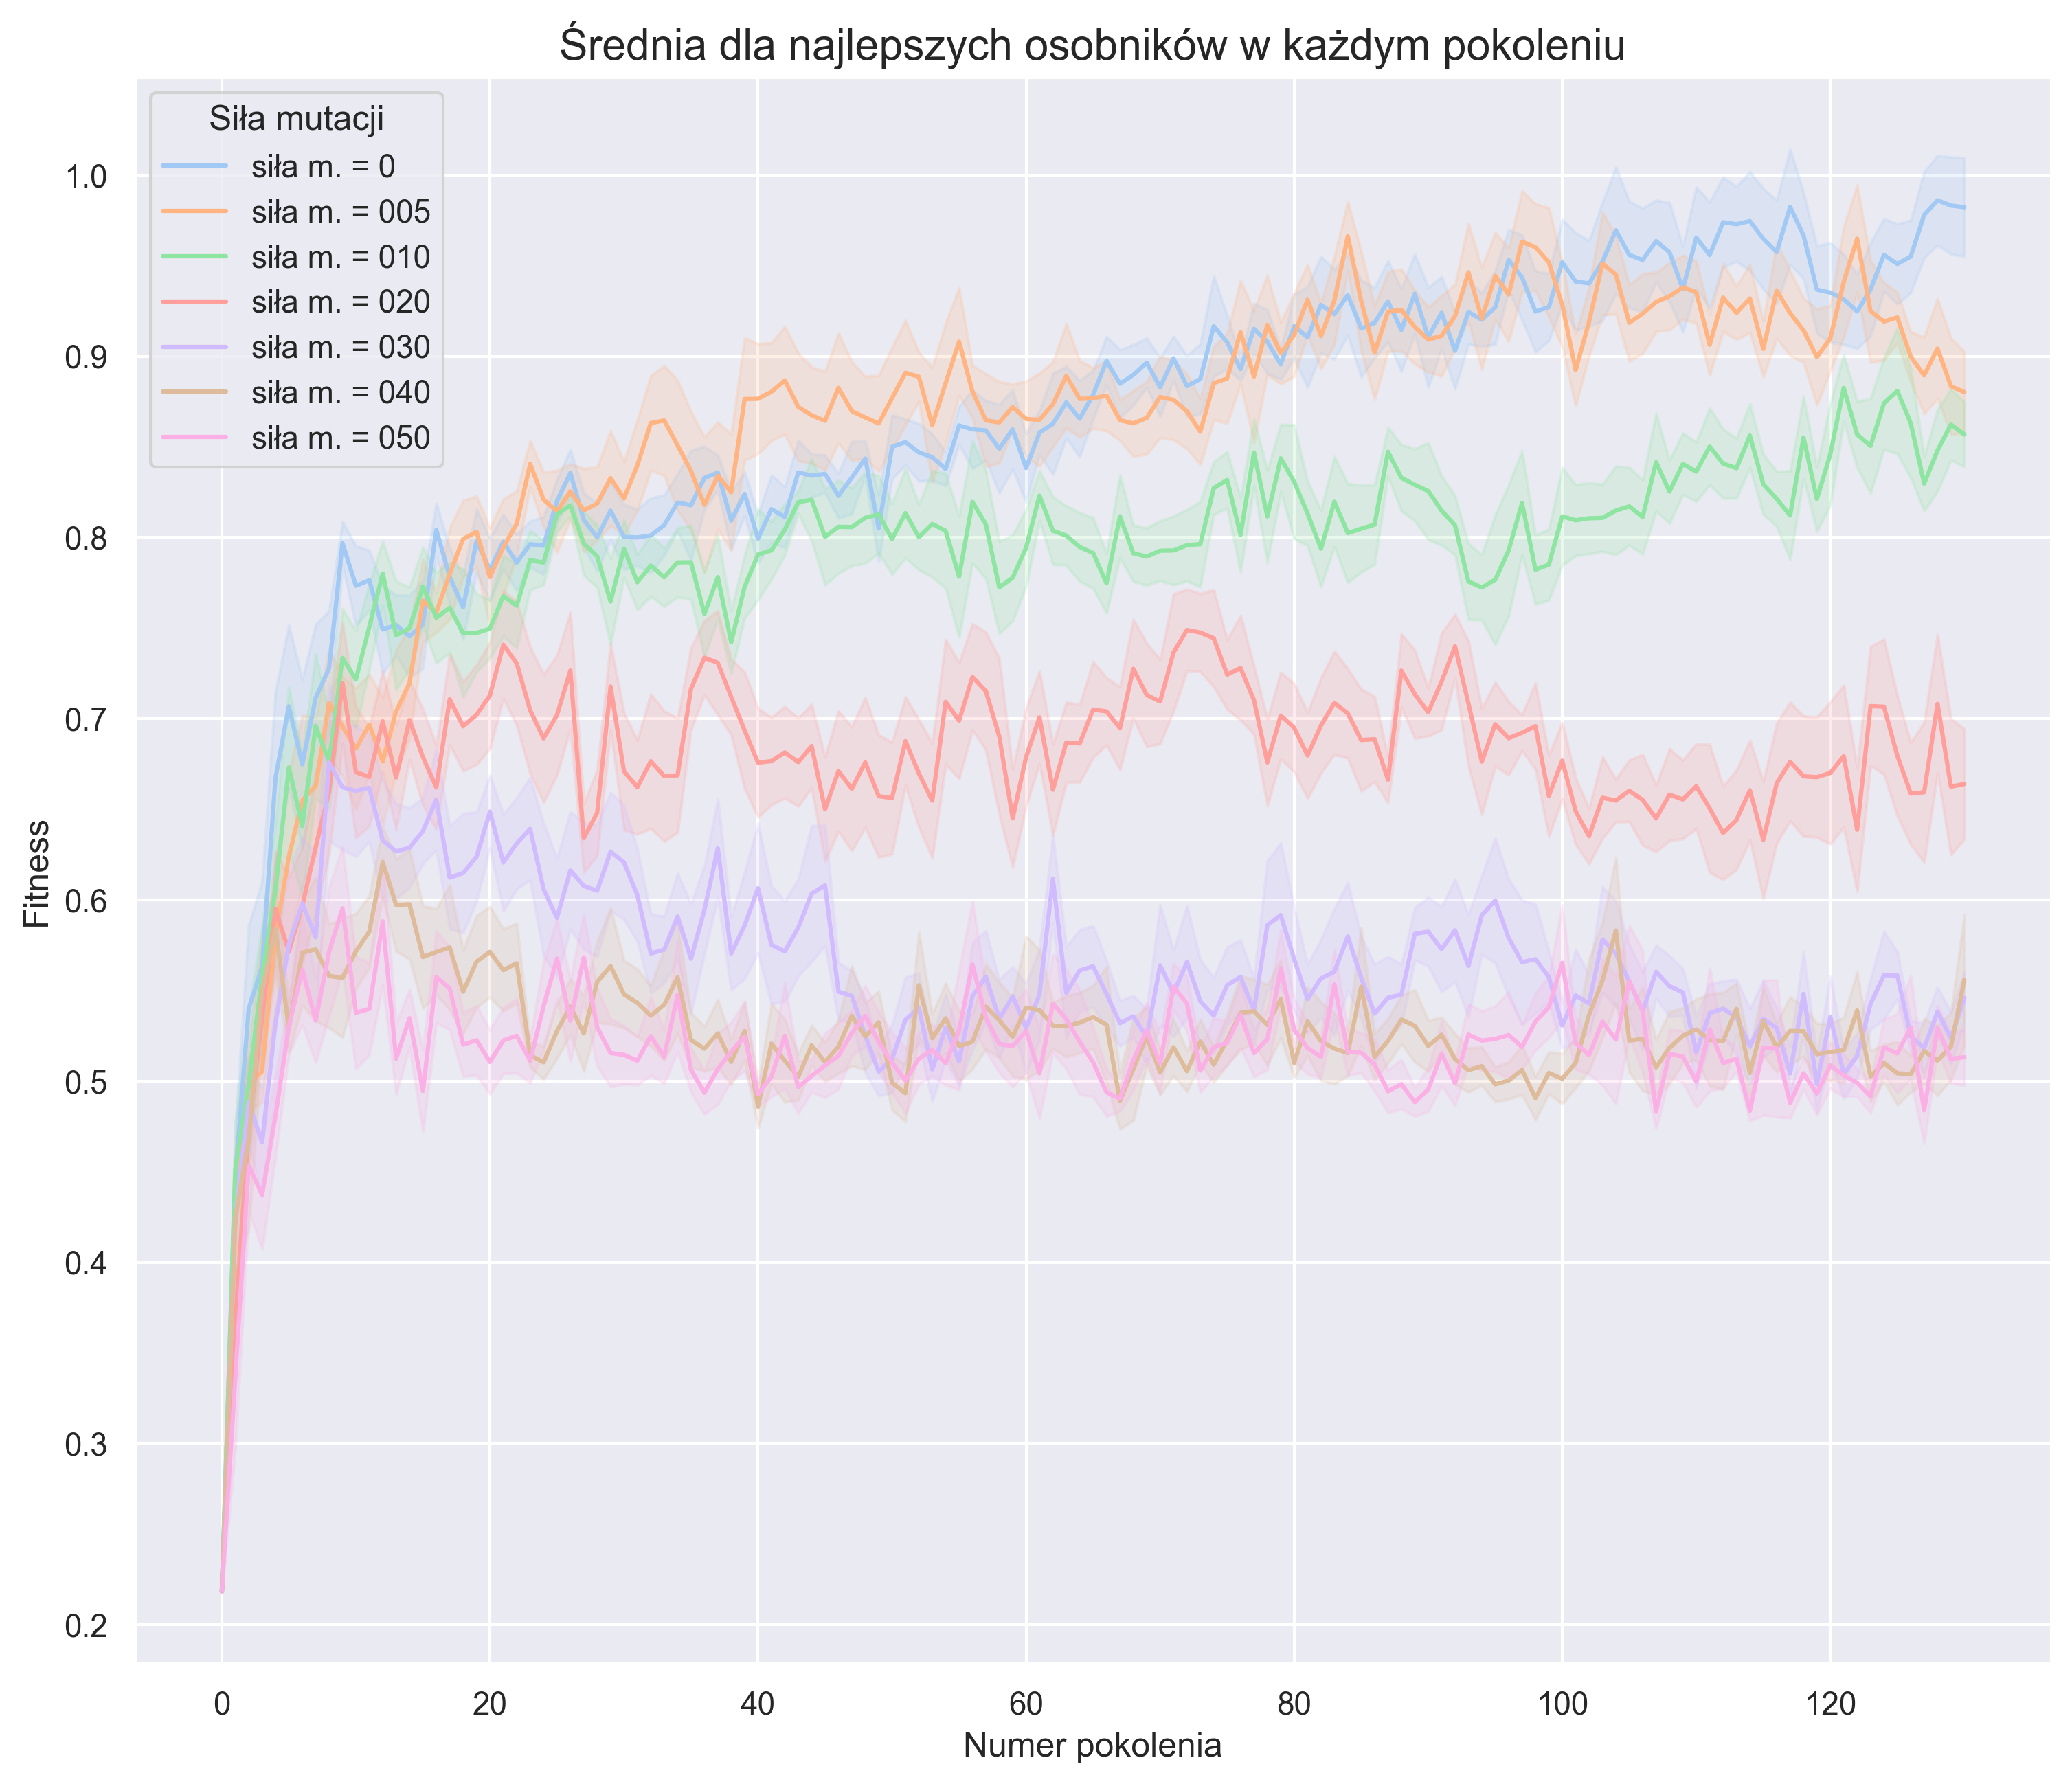

In [61]:
M_VALUES = ["0", "005", "010", "020", "030", "040", "050"]
palette = sns.color_palette("pastel", len(M_VALUES))
color_map = dict(zip(M_VALUES, palette)) 
plt.figure(figsize=(12, 10), dpi=300)

for m_value in M_VALUES:
    df = pd.DataFrame()
    for i in range(1, 11):
        df_temp = pd.read_csv(f"../framspy/f9-mut-{m_value}/Deap/f9-{i}.csv", usecols=['gen', 'max'])
        df = pd.concat([df, df_temp])
    sns.lineplot(df, x='gen', y='max', color=color_map[m_value], label=f"siła m. = {m_value}", errorbar=("sd", 0.3))

plt.title("Średnia dla najlepszych osobników w każdym pokoleniu", fontsize=15)
plt.ylabel("Fitness")
plt.xlabel("Numer pokolenia")

plt.legend(title="Siła mutacji")
plt.savefig('zadanie3-2.png')
plt.show()

# Zadanie 3

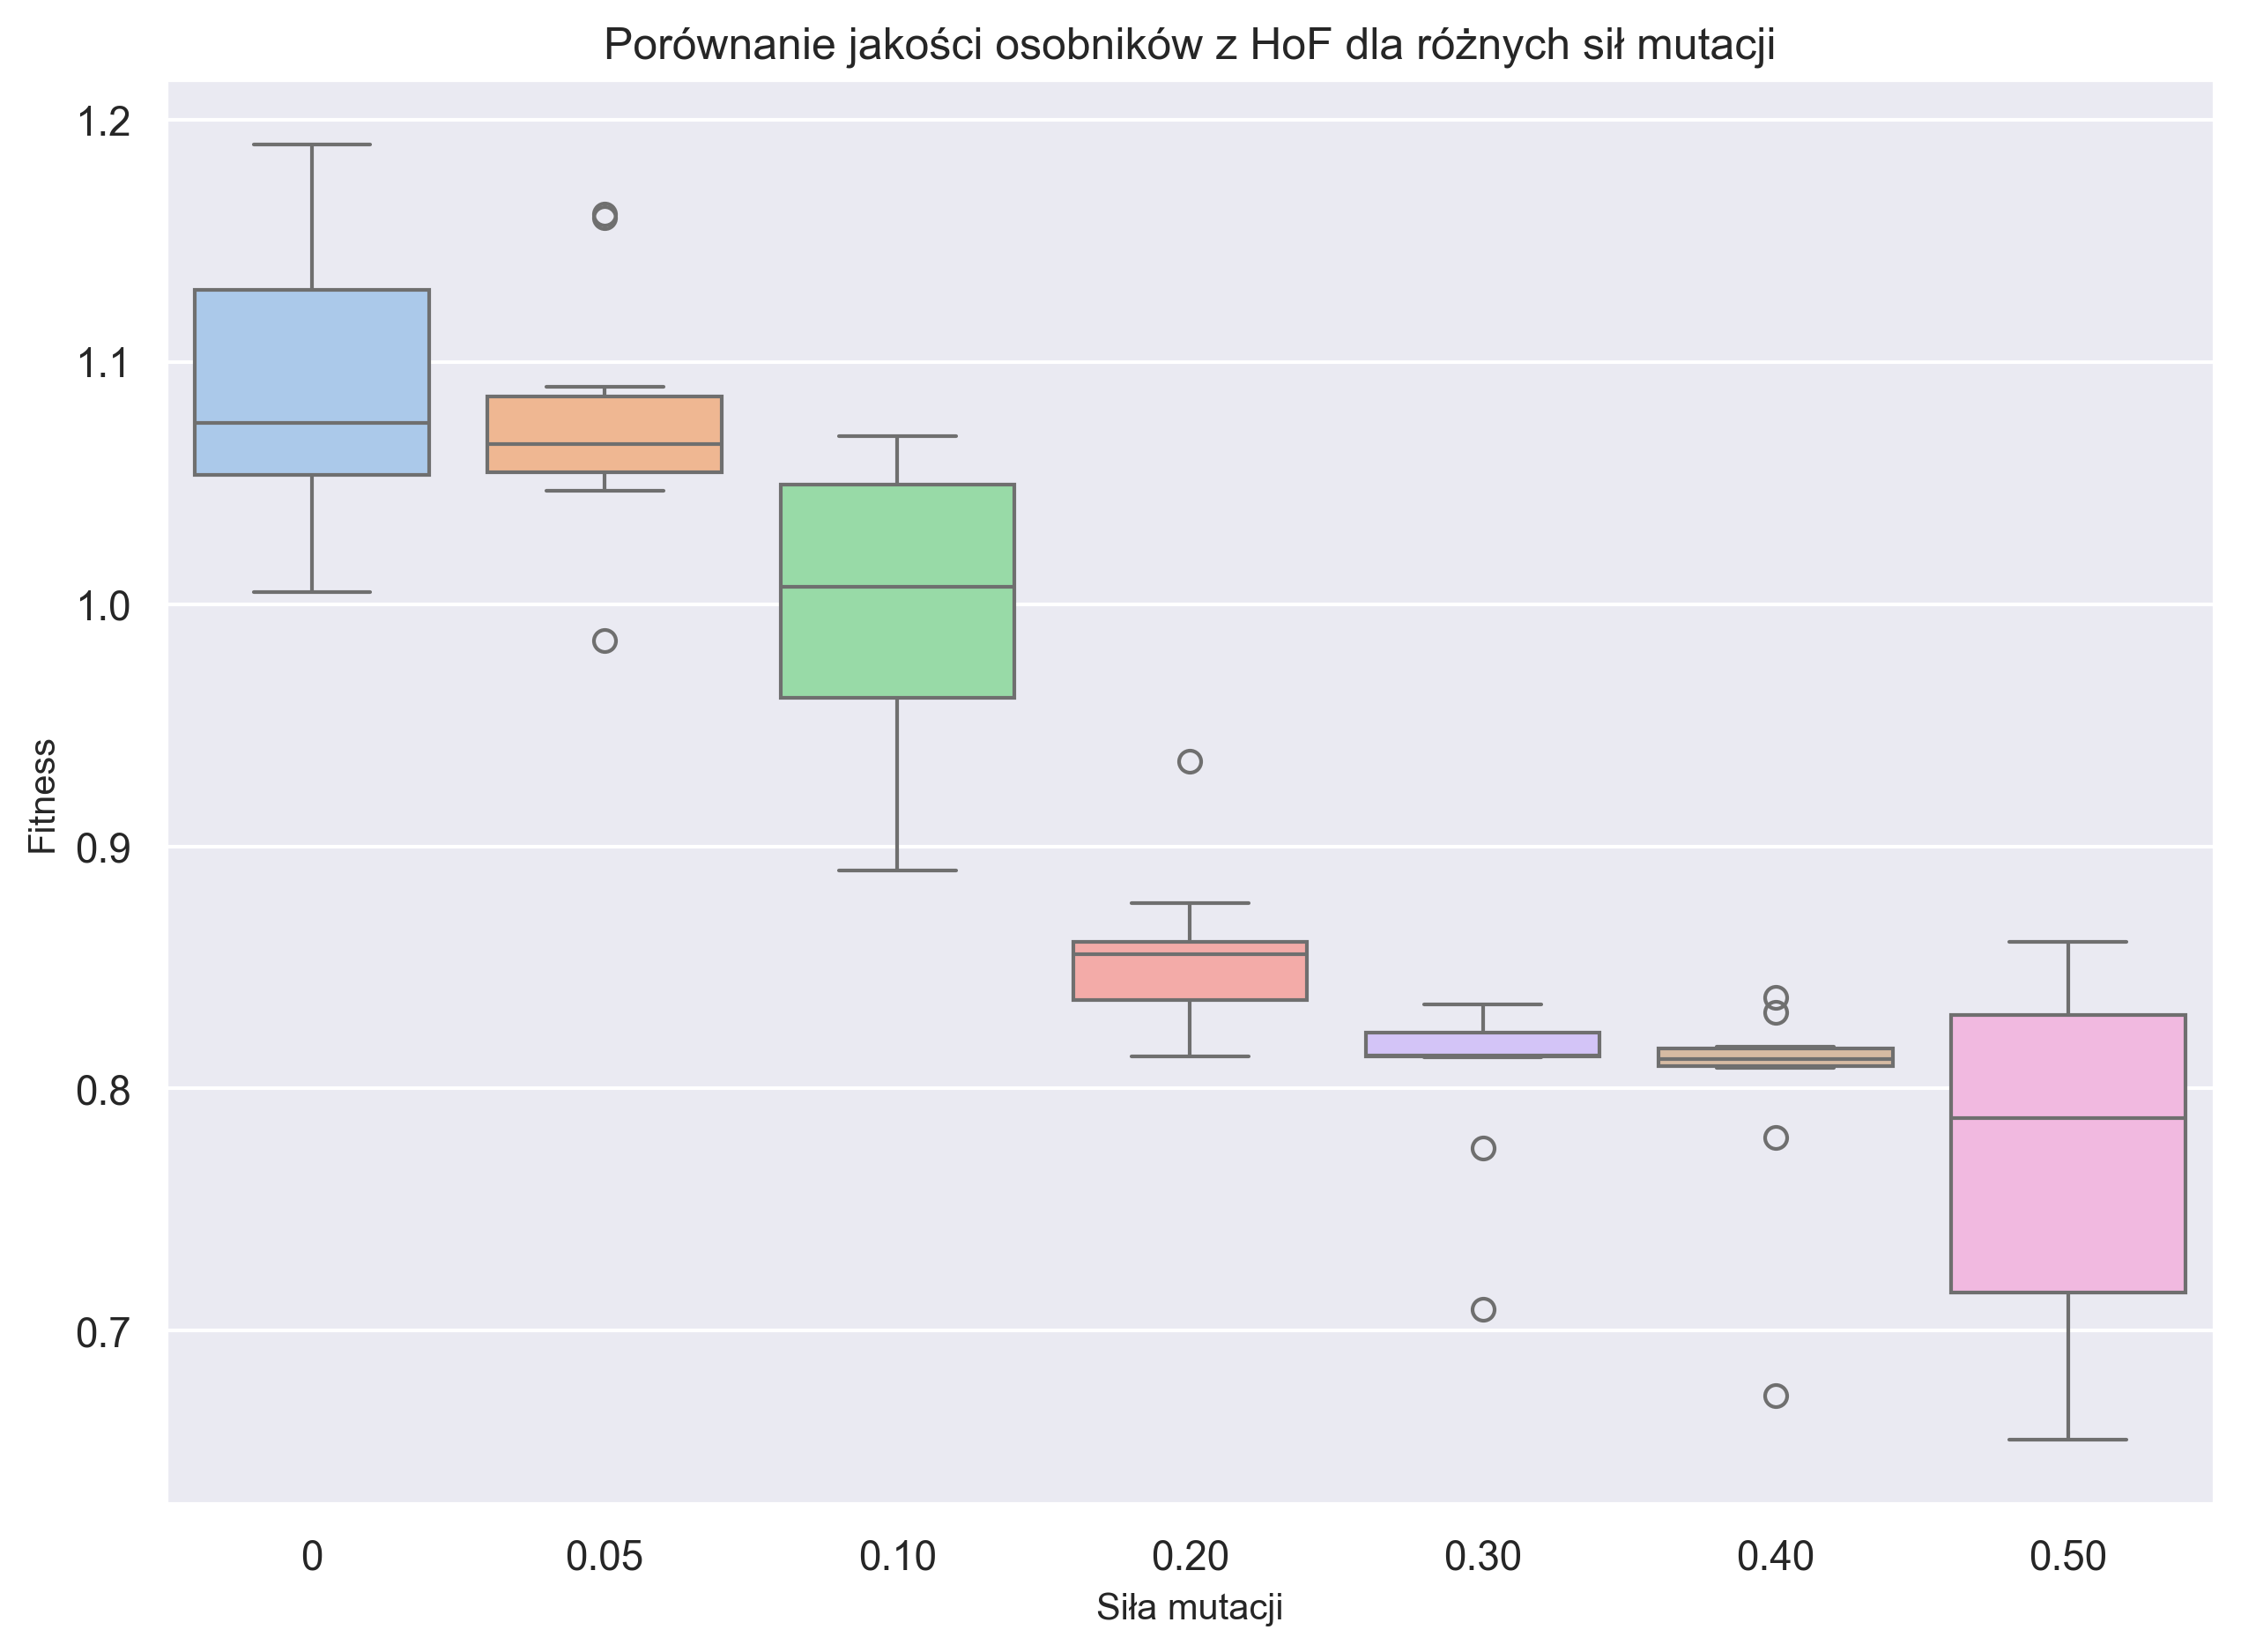

In [62]:
M_VALUES = ["0", "0.05", "0.10", "0.20", "0.30", "0.40", "0.50"]
palette = sns.color_palette("pastel", len(M_VALUES))
color_map = dict(zip(M_VALUES, palette)) 
plt.figure(figsize=(10, 7), dpi=300)

data = {m_value: [] for m_value in M_VALUES}
for m_value in M_VALUES:
    for i in range(1, 11):
        with open(f"../framspy/f9-mut-{m_value.replace('.', '')}/HoF/f9-{i}.gen") as file:
            for line in file:
                if line.startswith("vertpos"):
                    value = float(line.split(':')[1])
                    data[m_value].append(value)
    

df = pd.DataFrame(data)
sns.boxplot(df, palette='pastel')

plt.title("Porównanie jakości osobników z HoF dla różnych sił mutacji", fontsize=12)
plt.ylabel("Fitness", fontsize=10)
plt.xlabel("Siła mutacji", fontsize=10)
plt.savefig('zadanie3-3a.png')
plt.show()

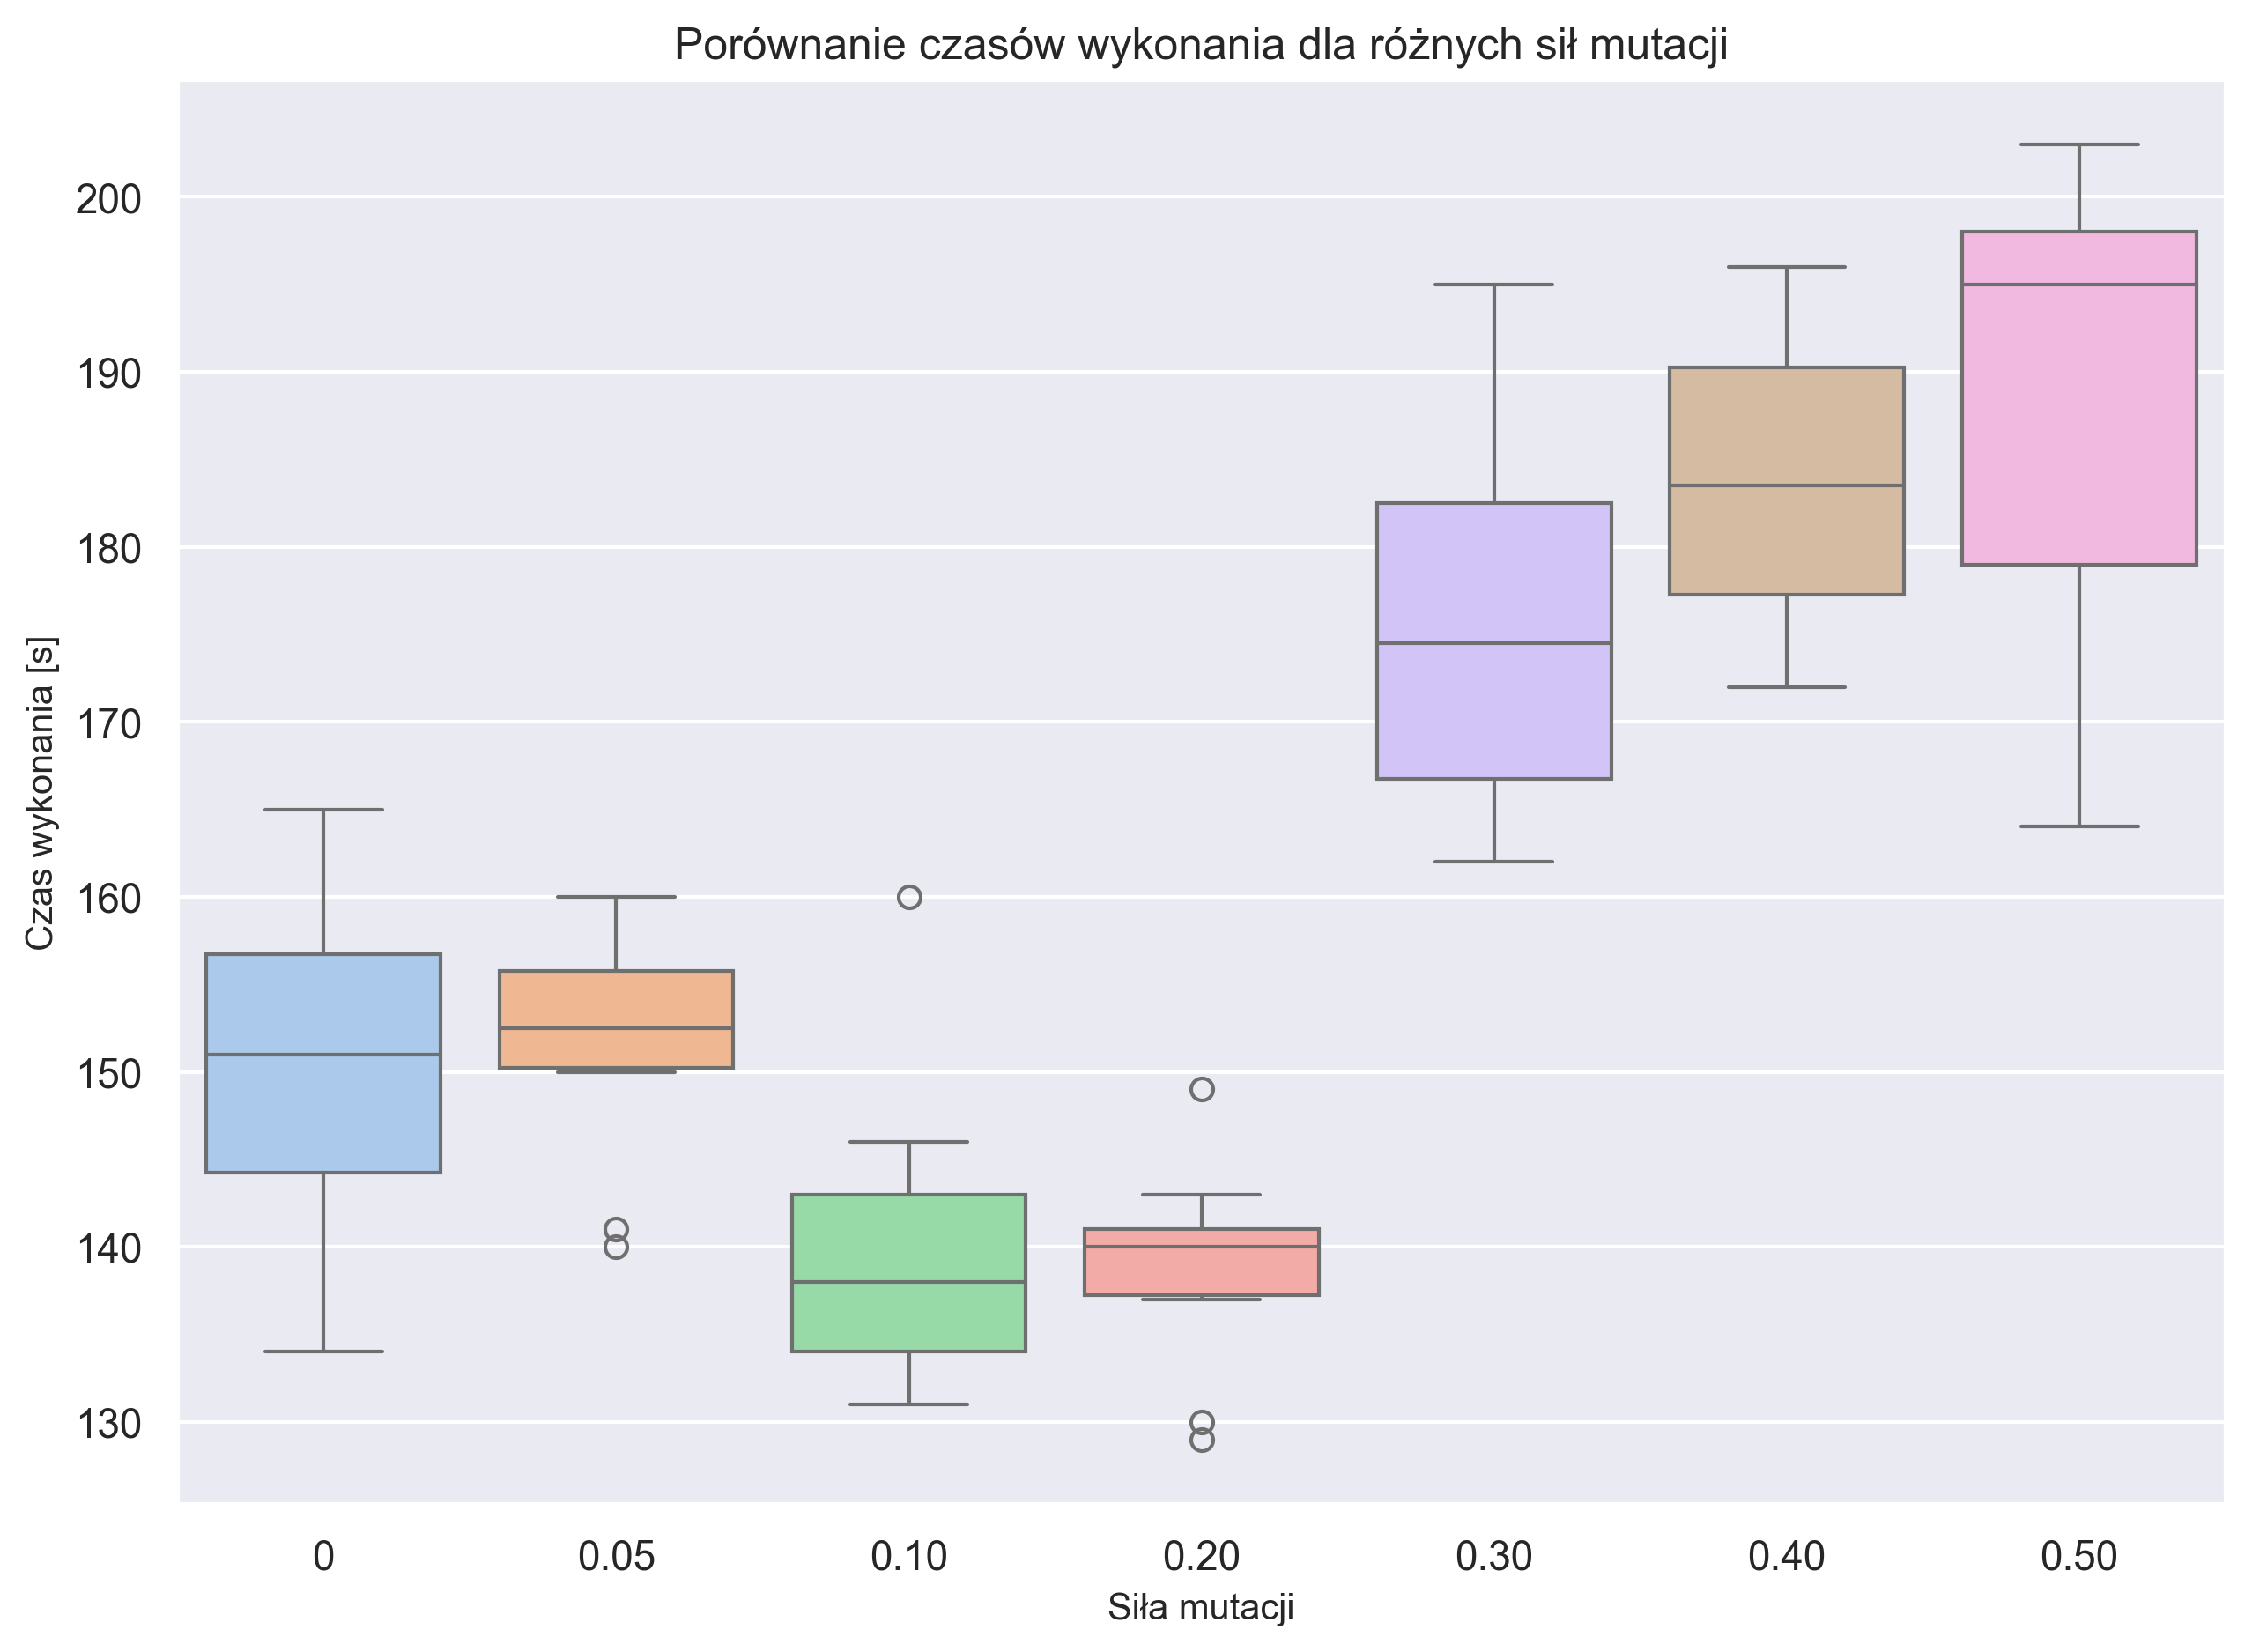

In [63]:
M_VALUES = ["0", "0.05", "0.10", "0.20", "0.30", "0.40", "0.50"]
palette = sns.color_palette("pastel", len(M_VALUES))
color_map = dict(zip(M_VALUES, palette)) 
plt.figure(figsize=(10, 7), dpi=300)

data = {m_value: [] for m_value in M_VALUES}
for m_value in M_VALUES:
    df = pd.read_csv(f"../framspy/f9-mut-{m_value.replace('.', '')}/times.txt")
    data[m_value] = df['time'].to_list()

df = pd.DataFrame(data)
sns.boxplot(df, palette='pastel')

plt.title("Porównanie czasów wykonania dla różnych sił mutacji", fontsize=12)
plt.ylabel("Czas wykonania [s]", fontsize=10)
plt.xlabel("Siła mutacji", fontsize=10)
plt.savefig("zadanie3-3b.png")
plt.show()